<a href="https://colab.research.google.com/github/nishi1612/Machine-Learning-For-Data-Mining/blob/master/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
N = 50
M = 2

In [0]:
def generate_input(N,M):
  mu = np.random.random((M,1))
  sigma = np.random.random((M,1))
  X = np.ones((N,M+1))
  for i in range(M):
     X[:,i] = np.random.normal(mu[i],sigma[i],N)
  return X

In [0]:
def predict_output(X,weight):
  return np.matmul(X,weight)

In [0]:
def generate_output(X,M):
  weight = np.random.random((M+1,1))
  Y = predict_output(X,weight)
  return weight, Y

In [0]:
def add_noise(Y,N):
  noise = np.random.random((N,1))
  Y_noise = Y+noise
  return Y_noise

In [0]:
def closed_form(X,Y_noise):
  a = np.linalg.inv(np.matmul(X.transpose(),X))
  b = np.matmul(a,X.transpose())
  weight_predicted = np.matmul(b,Y_noise)
  return weight_predicted

In [0]:
def calculate_mse(y_predicted,y,N):
  mse = np.sum((y_predicted - y)**2)
  return mse/N

**Closed form solution**

In [0]:
X = generate_input(N,M)
weight, Y = generate_output(X,M)
Y_noise = add_noise(Y,N)
weight_predicted = closed_form(X,Y_noise)
y_predicted = predict_output(X,weight_predicted)
mse = calculate_mse(y_predicted,Y_noise,N)
mse

0.06489050089921282

In [0]:
X.shape, weight.shape

((50, 3), (3, 1))

In [0]:
def gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.000000001,0.00000001,0.0000001]
  for alpha in alphas:
    theta = np.ones((X.shape[1],1))
    h = predict_output(X,theta)
    cost = np.zeros((epochs,1))
    for i in range(epochs):
        theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
        for j in range(1,X.shape[1]):
          theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
          h = predict_output(X,theta)
        cost[i] = calculate_mse(Y,h,X.shape[0])
    plt.plot(np.arange(epochs),cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.0000001):
      return theta

**Gradient Descent Method for multi variable linear regression**

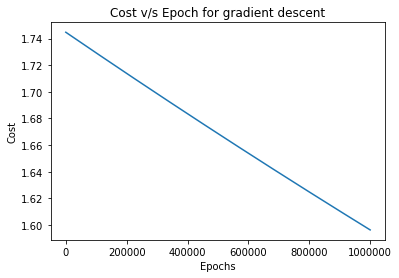

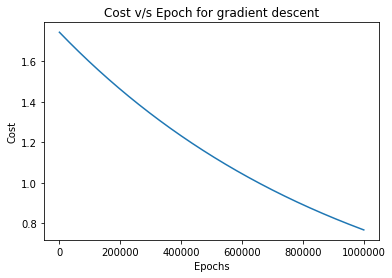

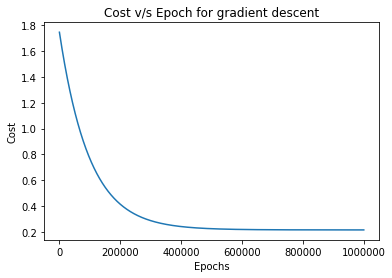

0.21576991891825556

In [0]:
weight_predicted = gradient_descent(X,Y_noise)
y_predicted = predict_output(X,weight_predicted)
mse = calculate_mse(y_predicted,Y_noise,N)
mse

In [0]:
weight_predicted, weight

(array([[ 0.97596947],
        [ 1.01585921],
        [-0.2015266 ]]), array([[0.05942094],
        [0.62010767],
        [0.28910022]]))

The above graphs show that as we increase the value of learning rate the optimum cost is reached faster.

In [0]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [0]:
def logistic_cost(y_actual,y_predicted):
  return np.sum(((-y_actual*np.log(y_predicted)) - ((1-y_actual)*np.log(1-y_predicted))))/y_predicted.shape[0]

In [0]:
def logistic_output(X,theta):
  t = sigmoid(np.dot(X,theta))
  print(t.shape)
  for i in range(t.shape[0]):
    if(t[i]<0.5):
      t[i]=0
    else:
      t[i]=1
  return t

In [0]:
def logistic_gradient_descent(X,Y):
  epochs = 1000000
  alphas = [0.000000001,0.00000001,0.0000001,0.000001]
  for alpha in alphas:
    theta = np.ones((X.shape[1],1))
    h = sigmoid(np.dot(X,theta))
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        h = sigmoid(np.dot(X,theta))
      cost[i] = logistic_cost(Y,h)
    plt.plot(np.arange(epochs),cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.000001):
      return theta

In [0]:
def prediction_table(y_actual,y_predicted):
  table = pd.DataFrame(columns=['Positive','Negative'])
  tp = 0
  tn = 0
  fp = 0
  fn = 0
  for i in range(y_predicted.shape[0]):
    if(y_actual[i]==1):
      if(y_predicted[i]==1):
        tp+=1
      else:
        fn+=1
    elif(y_actual[i]==0):
      if(y_predicted[i]==1):
        fp+=1
      else:
        tn+=1
  table.loc['Positive'] = [tp,fp]
  table.loc['Negative'] = [fn,tn]
  return table

**Gradient Descent Solution for multi variable logistic regression**

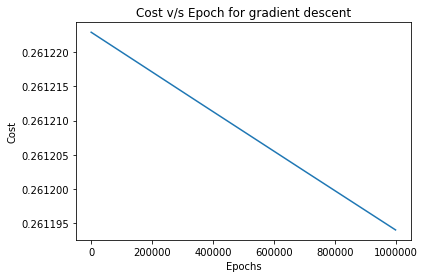

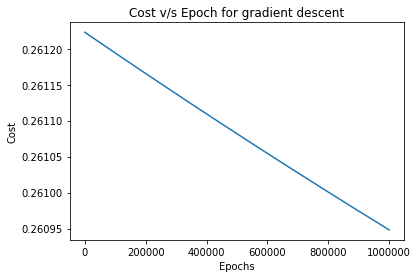

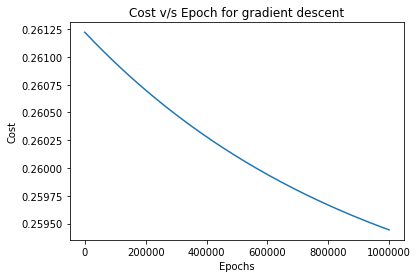

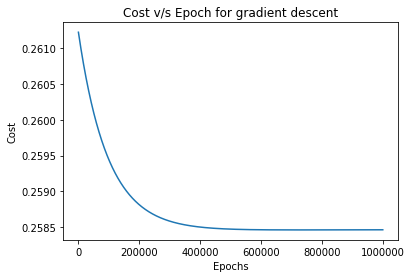

1.4626335615654682

In [0]:
y_categorical = logistic_output(X,weight)
weight_predicted = logistic_gradient_descent(X,y_categorical)
y_hat = sigmoid(np.dot(X,weight_predicted))
cost = logistic_cost(y_categorical,y_hat)
y_predicted = logistic_output(X,weight_predicted)
cost

In [0]:
df = prediction_table(y_categorical,y_predicted)
df

,Positive,Negative
Positive,45,5
Negative,0,0


In [0]:
weight_predicted , weight

(array([[1.00488038],
        [0.99677914],
        [1.24401907]]), array([[0.05942094],
        [0.62010767],
        [0.28910022]]))

In [0]:
y_categorical

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [0]:
y_predicted

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

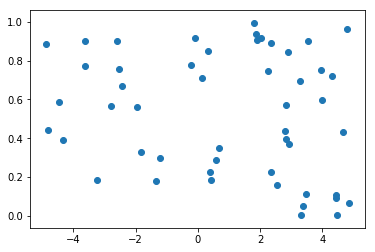

In [0]:
x = np.random.uniform(-5,5,(50,1))
y = np.random.uniform(0,1,(50,1))
plt.scatter(x,y)
plt.show()

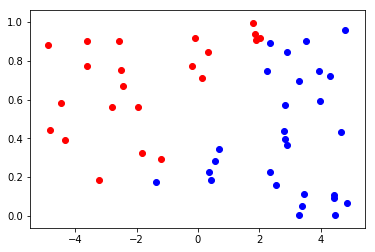

In [0]:
labels = np.zeros((x.shape[0],1))
vals = np.zeros((x.shape[0],1))
for i in range(x.shape[0]):
  if(y[i]<1/(1 + math.exp(-x[i]))):
    labels[i]=0
  else:
    labels[i]=1
for i in range(x.shape[0]):
  if(labels[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
# plt.plot(np.sort(x,axis=0),1/(1+np.exp(-np.sort(x,axis=0))),color='green')
plt.show()

In [0]:
X = np.zeros((x.shape[0],2))
X[:,1] = x[:,0]
X[:,0] = np.ones(x.shape[0])
Y = labels

In [0]:
def logistic_gradient_descent(X,Y):
  epochs = 600000
  alphas = [0.000001]
  for alpha in alphas:
    theta = np.zeros((X.shape[1],1))
    h = sigmoid(np.dot(X,theta))
    cost = np.zeros((epochs,1))
    for i in range(epochs):
      theta[0] = theta[0] - alpha*np.sum(h-Y)/X.shape[0]
      for j in range(1,X.shape[1]):
        theta[j] = theta[j] - alpha/X.shape[0] * np.sum((h-Y)*X[:,j])
        h = sigmoid(np.dot(X,theta))
      cost[i] = logistic_cost(Y,h)
      if(i%20000==0):
        print("Epoch : " , i , " Cost : " , cost[i])
    plt.plot(np.arange(epochs),cost)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Cost v/s Epoch for gradient descent')
    plt.show()
    if(alpha==0.000001):
      return theta

Epoch :  0  Cost :  [0.69314402]
Epoch :  20000  Cost :  [0.6386927]
Epoch :  40000  Cost :  [0.59836472]
Epoch :  60000  Cost :  [0.56803747]
Epoch :  80000  Cost :  [0.54487205]
Epoch :  100000  Cost :  [0.52691489]
Epoch :  120000  Cost :  [0.5128089]
Epoch :  140000  Cost :  [0.50159775]
Epoch :  160000  Cost :  [0.49259633]
Epoch :  180000  Cost :  [0.48530558]
Epoch :  200000  Cost :  [0.47935594]
Epoch :  220000  Cost :  [0.47446951]
Epoch :  240000  Cost :  [0.47043431]
Epoch :  260000  Cost :  [0.46708651]
Epoch :  280000  Cost :  [0.46429799]
Epoch :  300000  Cost :  [0.46196747]
Epoch :  320000  Cost :  [0.46001414]
Epoch :  340000  Cost :  [0.45837294]
Epoch :  360000  Cost :  [0.45699113]
Epoch :  380000  Cost :  [0.45582566]
Epoch :  400000  Cost :  [0.45484117]
Epoch :  420000  Cost :  [0.45400849]
Epoch :  440000  Cost :  [0.45330345]
Epoch :  460000  Cost :  [0.45270593]
Epoch :  480000  Cost :  [0.45219913]
Epoch :  500000  Cost :  [0.45176898]
Epoch :  520000  Cost :

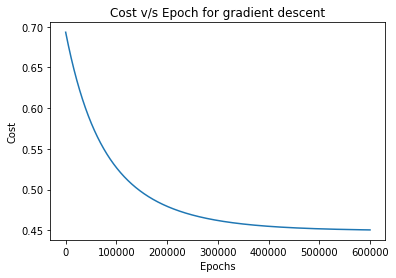

(50, 1)


0.45041439563468016

In [0]:
weight_predicted = logistic_gradient_descent(X,Y)
y_hat = sigmoid(np.dot(X,weight_predicted))
cost = logistic_cost(Y,y_hat)
y_predicted = logistic_output(X,weight_predicted)
cost

In [0]:
df = prediction_table(Y,y_predicted)
df

,Positive,Negative
Positive,16,1
Negative,6,27


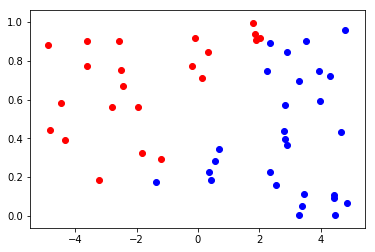

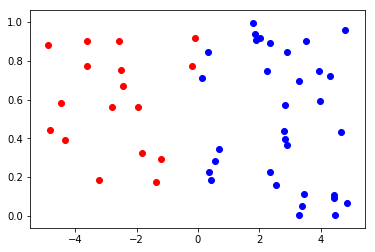

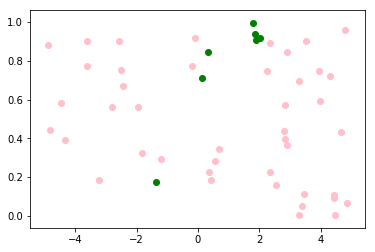

In [0]:
for i in range(x.shape[0]):
  if(labels[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.show()
for i in range(x.shape[0]):
  if(y_predicted[i]==1):
    plt.scatter(x[i],y[i],color='red')
  else:
    plt.scatter(x[i],y[i],color='blue')
plt.show()
for i in range(x.shape[0]):
  if(y_predicted[i]==labels[i]):
    plt.scatter(x[i],y[i],color='pink')
  else:
    plt.scatter(x[i],y[i],color='green')
plt.show()